# TASK:2

# Stock Prediction

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [2]:
df = yf.download('AAPL', start='2012-01-01', end='2022-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
print(training_data_len)

2392


In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data)

[[0.00444329]
 [0.00491767]
 [0.00590292]
 ...
 [0.99429028]
 [0.98719814]
 [0.98341175]]


In [5]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [6]:
print(train_data)

[[0.00444329]
 [0.00491767]
 [0.00590292]
 ...
 [0.35419889]
 [0.35739935]
 [0.36746653]]


In [7]:
print(test_data)

[[0.36307903]
 [0.3666401 ]
 [0.36452153]
 [0.3717338 ]
 [0.38141031]
 [0.38246207]
 [0.39242407]
 [0.3859931 ]
 [0.38397967]
 [0.38983966]
 [0.39508363]
 [0.39183809]
 [0.39353599]
 [0.39583491]
 [0.39445253]
 [0.38038858]
 [0.39352095]
 [0.40351298]
 [0.40280677]
 [0.38123001]
 [0.37995282]
 [0.39526393]
 [0.3991706 ]
 [0.4048202 ]
 [0.39703694]
 [0.39932082]
 [0.39640584]
 [0.40781033]
 [0.40430933]
 [0.40442957]
 [0.3954893 ]
 [0.40243113]
 [0.39744262]
 [0.38654904]
 [0.36420596]
 [0.34903007]
 [0.35589679]
 [0.32715277]
 [0.32691236]
 [0.36515258]
 [0.35089328]
 [0.37105763]
 [0.35630251]
 [0.35045752]
 [0.31610898]
 [0.34491307]
 [0.33002267]
 [0.289153  ]
 [0.33383919]
 [0.28010759]
 [0.29610986]
 [0.286809  ]
 [0.28396916]
 [0.26061936]
 [0.25330187]
 [0.28712455]
 [0.28508107]
 [0.30449416]
 [0.28841675]
 [0.29903986]
 [0.29825852]
 [0.27815425]
 [0.28419454]
 [0.27890554]
 [0.31054948]
 [0.30598168]
 [0.31595872]
 [0.31884361]
 [0.3267471 ]
 [0.34748243]
 [0.34354573]
 [0.34

In [8]:
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [9]:
print(X_train, y_train)

[[0.00444329 0.00491767 0.00590292 ... 0.03572663 0.03864375 0.03751897]
 [0.00491767 0.00590292 0.00684095 ... 0.03864375 0.03751897 0.03686857]
 [0.00590292 0.00684095 0.00669713 ... 0.03751897 0.03686857 0.03901079]
 ...
 [0.21217676 0.21524197 0.22183822 ... 0.34289964 0.34330531 0.35177979]
 [0.21524197 0.22183822 0.21817199 ... 0.34330531 0.35177979 0.35161448]
 [0.22183822 0.21817199 0.21740567 ... 0.35177979 0.35161448 0.35419889]] [0.03686857 0.03901079 0.04049189 ... 0.35161448 0.35419889 0.35739935]


In [10]:
print(X_test, y_test)

[[0.36307903 0.3666401  0.36452153 ... 0.39532404 0.39207851 0.394152  ]
 [0.3666401  0.36452153 0.3717338  ... 0.39207851 0.394152   0.39436238]
 [0.36452153 0.3717338  0.38141031 ... 0.394152   0.39436238 0.39389659]
 ...
 [0.80003904 0.79450963 0.7942091  ... 0.97181192 0.97565848 1.        ]
 [0.79450963 0.7942091  0.79126413 ... 0.97565848 1.         0.99374929]
 [0.7942091  0.79126413 0.79282676 ... 1.         0.99374929 0.99429028]] [0.39436238 0.39389659 0.39977161 0.40201042 0.40468498 0.40047782
 0.41427133 0.41721634 0.43303831 0.44633599 0.42088259 0.42524001
 0.43153575 0.44519403 0.44445779 0.44466817 0.44164801 0.45539644
 0.46690607 0.45718449 0.46436673 0.44752303 0.4597689  0.46430662
 0.46326985 0.46326985 0.47790483 0.47616185 0.48920408 0.4916683
 0.49267499 0.49001548 0.49951168 0.50352349 0.49629617 0.49512418
 0.50732497 0.49916607 0.50080386 0.4741935  0.47281112 0.48600362
 0.47664268 0.48738599 0.49429779 0.55482098 0.5709134  0.57528586
 0.57767493 0.6007542

In [11]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [12]:
print(X_train)

[[[0.00444329]
  [0.00491767]
  [0.00590292]
  ...
  [0.03572663]
  [0.03864375]
  [0.03751897]]

 [[0.00491767]
  [0.00590292]
  [0.00684095]
  ...
  [0.03864375]
  [0.03751897]
  [0.03686857]]

 [[0.00590292]
  [0.00684095]
  [0.00669713]
  ...
  [0.03751897]
  [0.03686857]
  [0.03901079]]

 ...

 [[0.21217676]
  [0.21524197]
  [0.22183822]
  ...
  [0.34289964]
  [0.34330531]
  [0.35177979]]

 [[0.21524197]
  [0.22183822]
  [0.21817199]
  ...
  [0.34330531]
  [0.35177979]
  [0.35161448]]

 [[0.22183822]
  [0.21817199]
  [0.21740567]
  ...
  [0.35177979]
  [0.35161448]
  [0.35419889]]]


In [13]:
print(y_test)

[0.39436238 0.39389659 0.39977161 0.40201042 0.40468498 0.40047782
 0.41427133 0.41721634 0.43303831 0.44633599 0.42088259 0.42524001
 0.43153575 0.44519403 0.44445779 0.44466817 0.44164801 0.45539644
 0.46690607 0.45718449 0.46436673 0.44752303 0.4597689  0.46430662
 0.46326985 0.46326985 0.47790483 0.47616185 0.48920408 0.4916683
 0.49267499 0.49001548 0.49951168 0.50352349 0.49629617 0.49512418
 0.50732497 0.49916607 0.50080386 0.4741935  0.47281112 0.48600362
 0.47664268 0.48738599 0.49429779 0.55482098 0.5709134  0.57528586
 0.57767493 0.60075426 0.58398571 0.59369224 0.57354288 0.59539015
 0.60741064 0.60679458 0.60499149 0.61073129 0.61160276 0.62703409
 0.66366656 0.67260678 0.66640119 0.6766036  0.66751311 0.66629604
 0.69173436 0.72262703 0.70591855 0.64269076 0.64317159 0.59424818
 0.6212943  0.59827504 0.58931978 0.60951422 0.61059606 0.5901011
 0.57934275 0.55830688 0.57778012 0.58817782 0.55998979 0.56660106
 0.59100265 0.60711011 0.60188118 0.61221881 0.61810887 0.595450

In [14]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=1)

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1912/1912 ━━━━━━━━━━━━━━━━━━━━ 58s 29ms/step - loss: 4.1477e-04


In [15]:
train_predict = model.predict(X_train)

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [16]:
test_predict = model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [17]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [18]:
print(train_predict)

[[19.906204]
 [20.007326]
 [20.131527]
 ...
 [73.39798 ]
 [73.87368 ]
 [74.35316 ]]


In [19]:
print(test_predict)

[[ 82.357025]
 [ 82.504   ]
 [ 82.60214 ]
 [ 82.78499 ]
 [ 83.035614]
 [ 83.34911 ]
 [ 83.57183 ]
 [ 84.01034 ]
 [ 84.56774 ]
 [ 85.45523 ]
 [ 86.68793 ]
 [ 87.425415]
 [ 87.91914 ]
 [ 88.34946 ]
 [ 88.97574 ]
 [ 89.60987 ]
 [ 90.18013 ]
 [ 90.5855  ]
 [ 91.14432 ]
 [ 91.951614]
 [ 92.58713 ]
 [ 93.21503 ]
 [ 93.404755]
 [ 93.605545]
 [ 93.87213 ]
 [ 94.11781 ]
 [ 94.32456 ]
 [ 94.79406 ]
 [ 95.3025  ]
 [ 96.050735]
 [ 96.88331 ]
 [ 97.6852  ]
 [ 98.32055 ]
 [ 98.99463 ]
 [ 99.68683 ]
 [100.15177 ]
 [100.421074]
 [100.81086 ]
 [101.035255]
 [101.18643 ]
 [100.71496 ]
 [ 99.956635]
 [ 99.4077  ]
 [ 98.82477 ]
 [ 98.527725]
 [ 98.55646 ]
 [100.03534 ]
 [102.41847 ]
 [105.098785]
 [107.67672 ]
 [110.388535]
 [112.47104 ]
 [114.19407 ]
 [115.07455 ]
 [115.88354 ]
 [116.78483 ]
 [117.599754]
 [118.23177 ]
 [118.81295 ]
 [119.30715 ]
 [120.02443 ]
 [121.54414 ]
 [123.46472 ]
 [125.23231 ]
 [126.937485]
 [128.197   ]
 [129.05339 ]
 [130.13968 ]
 [131.85094 ]
 [133.29121 ]
 [133.07538 ]
 [132.

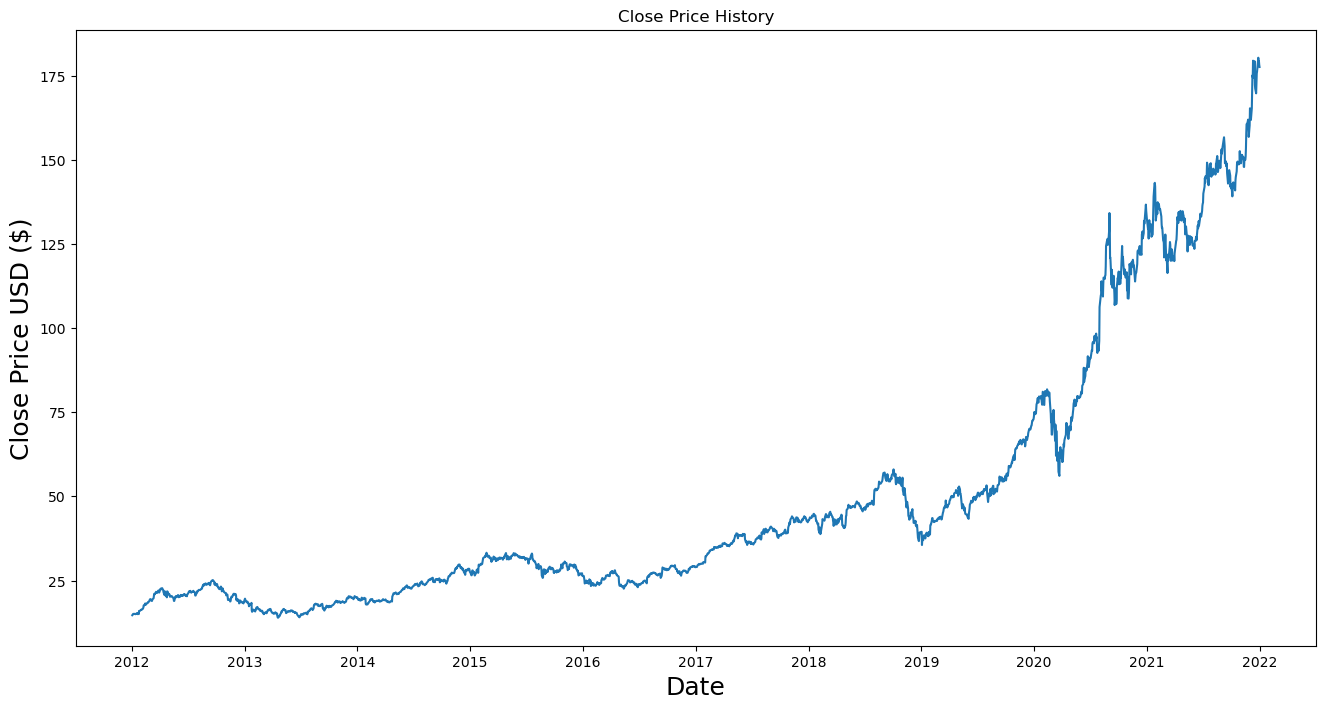

In [20]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.title('Close Price History')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()